#---------------------------------------------------#
3088 2373


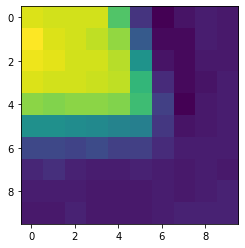

Original 2373 3088


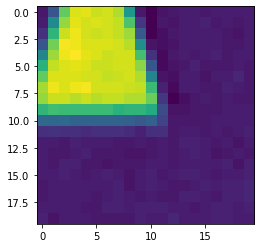

5 4
From second image 2373 3087
#---------------------------------------------------#
2977 2562


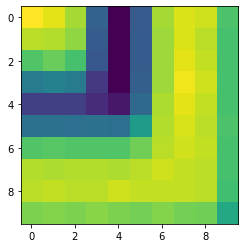

Original 2562 2977


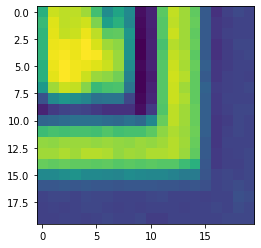

5 5
From second image 2562 2977
#---------------------------------------------------#
3029 2319


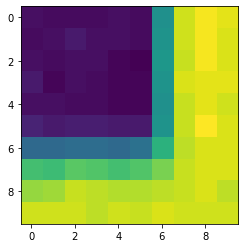

Original 2319 3029


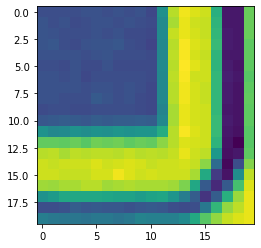

5 5
From second image 2319 3029
#---------------------------------------------------#
3006 2559


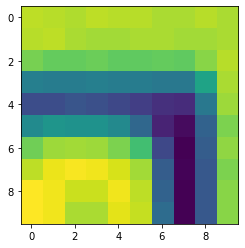

Original 2559 3006


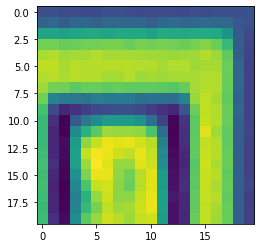

5 5
From second image 2559 3006
#---------------------------------------------------#
3006 2559


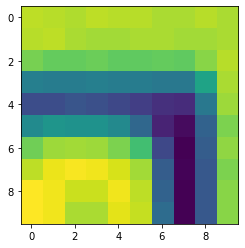

Original 2559 3006


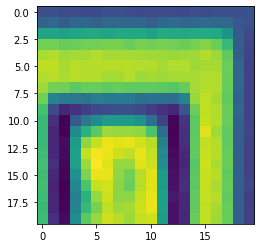

5 5
From second image 2559 3006
#---------------------------------------------------#
3030 2205


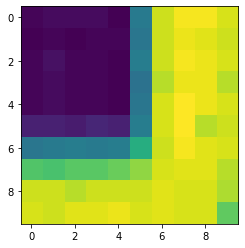

Original 2205 3030


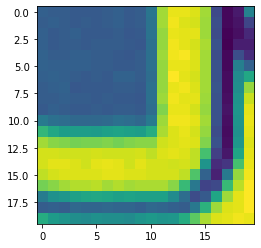

5 5
From second image 2205 3030
#---------------------------------------------------#
3030 2204


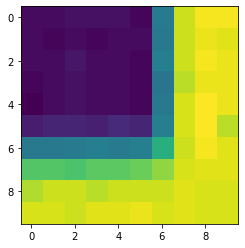

Original 2204 3030


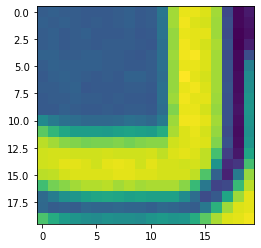

5 5
From second image 2204 3030
#---------------------------------------------------#
3029 2368


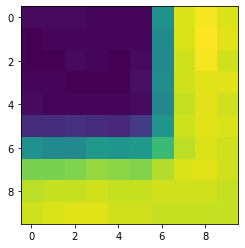

Original 2368 3029


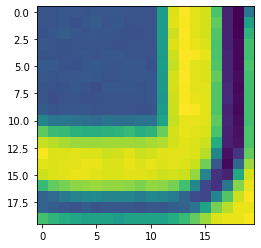

5 5
From second image 2368 3029
#---------------------------------------------------#
3113 2333


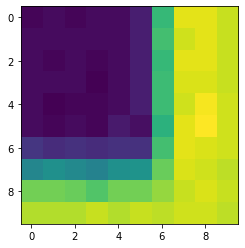

Original 2333 3113


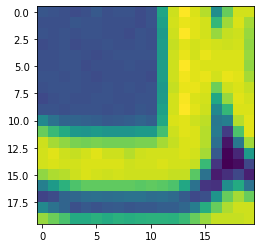

5 4
From second image 2333 3112
#---------------------------------------------------#
3114 2333


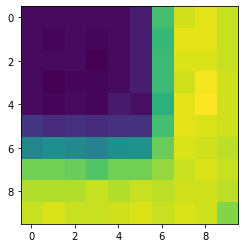

Original 2333 3114


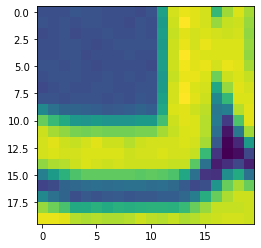

5 4
From second image 2333 3113
#---------------------------------------------------#
3031 2036


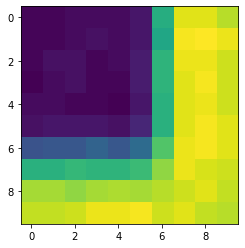

Original 2036 3031


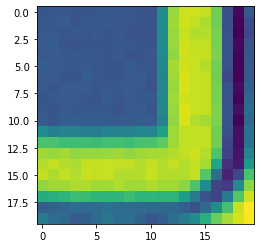

6 5
From second image 2037 3031
#---------------------------------------------------#
2975 2559


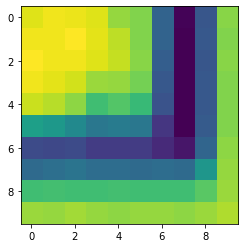

Original 2559 2975


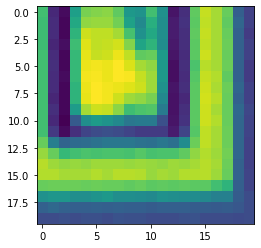

5 5
From second image 2559 2975
#---------------------------------------------------#
3074 2347


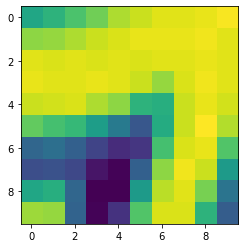

Original 2347 3074


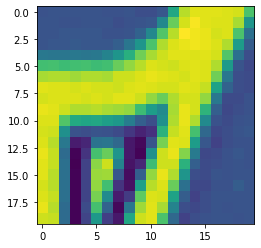

5 5
From second image 2347 3074
#---------------------------------------------------#
2982 2566


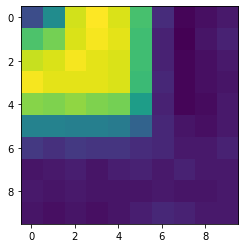

Original 2566 2982


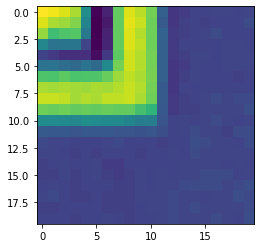

5 5
From second image 2566 2982
#---------------------------------------------------#
3027 2543


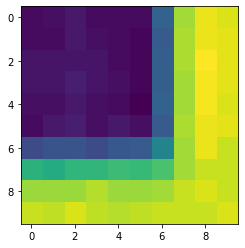

Original 2543 3027


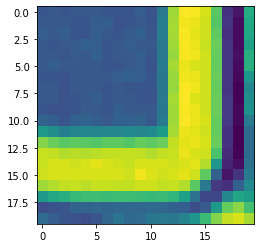

5 5
From second image 2543 3027
#---------------------------------------------------#
3027 2585


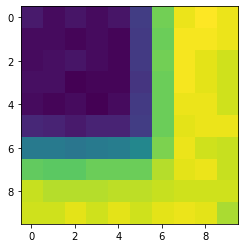

Original 2585 3027


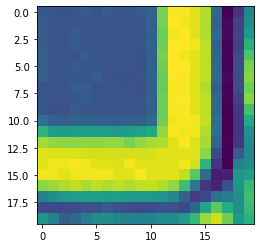

5 5
From second image 2585 3027
#---------------------------------------------------#
3031 2122


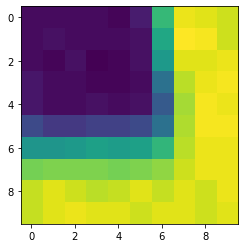

Original 2122 3031


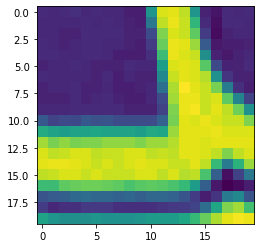

5 5
From second image 2122 3031
#---------------------------------------------------#
3031 2144


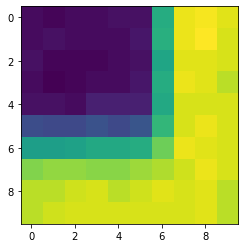

Original 2144 3031


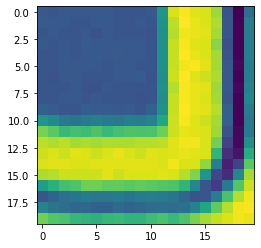

5 5
From second image 2144 3031


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import time
import os
import yaml


CONFIG_PATH = "/home/office5/Image_Code/"

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)
    return config

config = load_config("config.yaml")


image = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]

t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 7  # Aperture size
L2Gradient = True
edge = cv2.Canny(thresh, t_lower, t_upper, L2gradient = L2Gradient)
y, x = edge.shape

n = 8
start_x = 2
start_y = 7
edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]
output = cv2.connectedComponentsWithStats(edge1, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output


# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    x_ = stats[i, cv2.CC_STAT_LEFT]
    y_ = stats[i, cv2.CC_STAT_TOP]
    w_ = stats[i, cv2.CC_STAT_WIDTH]
    h_ = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    keepWidth = w_ > 2
    keepHeight = h_ > 2
    keepArea = area > 30

    if all((keepWidth, keepHeight, keepArea)):
        componentMask = (labels == i).astype("uint8") * 255
        cv2.imwrite(f"/home/office5/Image_Code/try_connected_component/{i}.png",componentMask)

get_min_max_hei_wid_value = []

for img1 in glob.glob('/home/office5/Image_Code/try_connected_component/*.png'):
    if img1 != '/home/office5/Image_Code/try_connected_component/0.png':
        img_name = img1.split('/')[-1]
        img = cv2.imread(img1)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # plt.imshow(dst)
        # plt.show()

        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

        for i in range(len(corners)):
            for j in range(1,config['measure_pixel']):
                hei_inc = int(np.int0(corners[i])[1]) + j
                wid_inc = int(np.int0(corners[i])[0]) + j
                hei_dec = int(np.int0(corners[i])[1]) - j
                wid_dec = int(np.int0(corners[i])[0]) - j
                same_hei = int(np.int0(corners[i])[1])
                same_wid = int(np.int0(corners[i])[0])

                check_extreme_point = []
                try:
                    if(gray[same_hei][same_wid]!=255):
                        break
                    else:
                        if( (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_dec]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_dec]!=255)):
                            break
                        else:
                            check_extreme_point.append(1)        
                except:
                    print("out of image")

            if(len(check_extreme_point)==1):

                print("#---------------------------------------------------#")
                ori_img_loc_y = start_y * y // n + same_hei
                ori_img_loc_x = start_x * x // n  + same_wid

                # print(ori_img_loc_y,ori_img_loc_x)

                x1_f = ori_img_loc_x - 5
                x2_f = ori_img_loc_x + 5
                y1_f = ori_img_loc_y - 5
                y2_f = ori_img_loc_y + 5
                # print(y1_f,y2_f,x1_f,x2_f)

                Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
                Anna2_img = cv2.imread(Anna2_img,0)
                img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
                img_first = img_crop1.astype(np.int8)
                plt.imshow(img_first)
                plt.show()
                print("Original",ori_img_loc_x,ori_img_loc_y)



                x1_s = ori_img_loc_x - 10
                x2_s = ori_img_loc_x + 10
                y1_s = ori_img_loc_y - 10
                y2_s = ori_img_loc_y + 10
                # print(y1_s,y2_s,x1_s,x2_s)

                Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna3.bmp"
                Anna3_img = cv2.imread(Anna3_img,0)

                img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
                plt.imshow(img_crop2)
                plt.show()
                img_snd = img_crop2.astype(np.int8)

                dict1 = {}
                for i in range(10):
                    for j in range(10):
                        dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
                # print(dict1)
                i,j = min(dict1, key=dict1.get)

                print(j,i)
                s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
                s_img_extr_point_y =y1_s + 10 - 5 + i

                print("From second image",s_img_extr_point_x,s_img_extr_point_y)
                # print(ori_img_loc_x,s_img_extr_point_x,ori_img_loc_y,s_img_extr_point_y)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import time
import os
import yaml


CONFIG_PATH = "/home/office5/Image_Code/"

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)
    return config

config = load_config("config.yaml")


image = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]

t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 7  # Aperture size
L2Gradient = True
edge = cv2.Canny(thresh, t_lower, t_upper, L2gradient = L2Gradient)
y, x = edge.shape

n = 8
start_x = 2
start_y = 7
edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]
output = cv2.connectedComponentsWithStats(edge1, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output


# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    x_ = stats[i, cv2.CC_STAT_LEFT]
    y_ = stats[i, cv2.CC_STAT_TOP]
    w_ = stats[i, cv2.CC_STAT_WIDTH]
    h_ = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    keepWidth = w_ > 2
    keepHeight = h_ > 2
    keepArea = area > 30

    if all((keepWidth, keepHeight, keepArea)):
        componentMask = (labels == i).astype("uint8") * 255
        cv2.imwrite(f"/home/office5/Image_Code/try_connected_component/{i}.png",componentMask)

get_min_max_hei_wid_value = []

for img1 in glob.glob('/home/office5/Image_Code/try_connected_component/*.png'):
    if img1 != '/home/office5/Image_Code/try_connected_component/0.png':
        img_name = img1.split('/')[-1]
        img = cv2.imread(img1)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # plt.imshow(dst)
        # plt.show()

        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

        for i in range(len(corners)):
            for j in range(1,config['measure_pixel']):
                hei_inc = int(np.int0(corners[i])[1]) + j
                wid_inc = int(np.int0(corners[i])[0]) + j
                hei_dec = int(np.int0(corners[i])[1]) - j
                wid_dec = int(np.int0(corners[i])[0]) - j
                same_hei = int(np.int0(corners[i])[1])
                same_wid = int(np.int0(corners[i])[0])

                check_extreme_point = []
                try:
                    if(gray[same_hei][same_wid]!=255):
                        break
                    else:
                        if( (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_dec]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_dec]!=255)):
                            break
                        else:
                            check_extreme_point.append(1)        
                except:
                    print("out of image")

            if(len(check_extreme_point)==1):

                print("#-------------------------New Points -------------------------------#")

                ori_img_loc_y = start_y * y // n + same_hei
                ori_img_loc_x = start_x * x // n  + same_wid

                lw,th,rw,bh=1,1,1,1

                # For storing count of every side pixel value such as left-width,right-width,top-height,bottom-height
                countlw,countth,countrw,countbh=0,0,0,0

                # For left width count store value
                wid_dec = same_wid- lw
                while(gray[same_hei][wid_dec]==255):
                    wid_dec = same_wid - lw
                    countlw+=1
                    lw+=1

                # For top height count store value
                hei_dec = same_hei- th
                while(gray[hei_dec][same_wid]==255):
                    hei_dec = same_hei - th
                    countth+=1
                    th+=1

                # For right width count store value
                wid_inc = same_wid + rw
                while(gray[same_hei][wid_inc]==255):
                    wid_inc = same_wid + rw
                    countrw+=1
                    rw+=1

                # For bottom height count store value
                hei_inc = same_hei + bh
                while(gray[hei_inc][same_wid]==255):
                    hei_inc = same_hei + bh
                    countbh+=1
                    bh+=1
                # print(ori_img_loc_y,ori_img_loc_x)

                x1_f = ori_img_loc_x - 5
                x2_f = ori_img_loc_x + 5
                y1_f = ori_img_loc_y - 5
                y2_f = ori_img_loc_y + 5
                # print(y1_f,y2_f,x1_f,x2_f)

                Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
                Anna2_img = cv2.imread(Anna2_img,0)
                img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
                img_first = img_crop1.astype(np.int8)
                # plt.imshow(img_first)
                # plt.show()



                x1_s = ori_img_loc_x - 10
                x2_s = ori_img_loc_x + 10
                y1_s = ori_img_loc_y - 10
                y2_s = ori_img_loc_y + 10
                # print(y1_s,y2_s,x1_s,x2_s)

                Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna19.bmp"
                Anna3_img = cv2.imread(Anna3_img,0)

                img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
                # plt.imshow(img_crop2)
                # plt.show()
                img_snd = img_crop2.astype(np.int8)

                dict1 = {}
                for i in range(10):
                    for j in range(10):
                        dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
                # print(dict1)
                i,j = min(dict1, key=dict1.get)

                print(j,i)
                s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
                s_img_extr_point_y =y1_s + 10 - 5 + i

                print("Original",ori_img_loc_x,ori_img_loc_y)
                print("From second image",s_img_extr_point_x,s_img_extr_point_y)
                print("X,Y,W,H",countlw,countth,countrw,countbh)

#-------------------------New Points -------------------------------#
4 6
Original 2373 3088
From second image 2372 3089
X,Y,W,H 12 7 0 0
#-------------------------New Points -------------------------------#
4 7
Original 2562 2977
From second image 2561 2979
X,Y,W,H 9 25 0 0
#-------------------------New Points -------------------------------#
4 6
Original 2319 3029
From second image 2318 3030
X,Y,W,H 15 27 0 0
#-------------------------New Points -------------------------------#
4 6
Original 2559 3006
From second image 2558 3007
X,Y,W,H 8 0 0 4
#-------------------------New Points -------------------------------#
4 6
Original 2559 3006
From second image 2558 3007
X,Y,W,H 8 0 0 4
#-------------------------New Points -------------------------------#
4 6
Original 2205 3030
From second image 2204 3031
X,Y,W,H 12 36 0 0
#-------------------------New Points -------------------------------#
4 6
Original 2204 3030
From second image 2203 3031
X,Y,W,H 12 18 0 0
#-------------------------New Poi

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import time
import os
import yaml


CONFIG_PATH = "/home/office5/Image_Code/"

# Function to load yaml configuration file
def load_config(config_name):
    with open(os.path.join(CONFIG_PATH, config_name)) as file:
        config = yaml.safe_load(file)
    return config

config = load_config("/home/office5/Image_Code/Ketan_sir/config.yaml")


image = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]

t_lower = 100  # Lower Threshold
t_upper = 200  # Upper threshold
aperture_size = 7  # Aperture size
L2Gradient = True
edge = cv2.Canny(thresh, t_lower, t_upper, L2gradient = L2Gradient)
y, x = edge.shape

n = 8
start_x = 2
start_y = 7
edge1 = edge[start_y * y // n: (start_y + 1) * y // n, start_x * x // n:(start_x + 1) * x // n]

# get each block of image into four corner
start_x1 = start_x * x // n
end_x1 = (start_x + 1) * x // n
start_y1 = start_y * y // n
end_y1 = (start_y + 1) * y // n
height,width = end_y1 - start_y1,end_x1 - start_x1
print(start_x1,start_y1)
# print("Height =",height , "Width =",width)
# print(height//2, width//2)
# print(0,height//2 , 0, width//2)
# print(0 , height//2,width//2, width)
# print(height//2,height, 0,width//2)
# print(height//2, height , width//2, width)

first_block, second_block, third_block, fourth_block = [],[],[],[]


output = cv2.connectedComponentsWithStats(edge1, 4, cv2.CV_32S)
(numLabels, labels, stats, centroids) = output


# loop over the number of unique connected component labels
for i in range(0, numLabels):
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    x_ = stats[i, cv2.CC_STAT_LEFT]
    y_ = stats[i, cv2.CC_STAT_TOP]
    w_ = stats[i, cv2.CC_STAT_WIDTH]
    h_ = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    keepWidth = w_ > 2
    keepHeight = h_ > 2
    keepArea = area > 30

    if all((keepWidth, keepHeight, keepArea)):
        componentMask = (labels == i).astype("uint8") * 255
        cv2.imwrite(f"/home/office5/Image_Code/try_connected_component/{i}.png",componentMask)

get_min_max_hei_wid_value = []

for img1 in glob.glob('/home/office5/Image_Code/Ketan_sir/try_connected_component/*.png'):
    if img1 != '/home/office5/Image_Code/Ketan_sir/try_connected_component/0.png':
        img_name = img1.split('/')[-1]
        img = cv2.imread(img1)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gray = np.float32(gray)
        dst = cv2.cornerHarris(gray,2,3,0.04)
        ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
        dst = np.uint8(dst)
        # plt.imshow(dst)
        # plt.show()

        ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
        corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

        for i in range(len(corners)):
            for j in range(1,config['measure_pixel']):
                hei_inc = int(np.int0(corners[i])[1]) + j
                wid_inc = int(np.int0(corners[i])[0]) + j
                hei_dec = int(np.int0(corners[i])[1]) - j
                wid_dec = int(np.int0(corners[i])[0]) - j
                same_hei = int(np.int0(corners[i])[1])
                same_wid = int(np.int0(corners[i])[0])

                check_extreme_point = []
                try:
                    if(gray[same_hei][same_wid]!=255):
                        break
                    else:
                        if( (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_dec]!=255) and (gray[hei_dec][same_wid]!=255 or gray[same_hei][wid_inc]!=255) and (gray[hei_inc][same_wid]!=255 or gray[same_hei][wid_dec]!=255)):
                            break
                        else:
                            check_extreme_point.append(1)        
                except:
                    print("out of image")

            if(len(check_extreme_point)==1):
                # print(same_hei,same_wid)

                # print("#-------------------------New Points -------------------------------#")


                # ori_img_loc_y = start_y * y // n + same_hei
                # ori_img_loc_x = start_x * x // n  + same_wid

                lw,th,rw,bh=1,1,1,1

                # For storing count of every side pixel value such as left-width,right-width,top-height,bottom-height
                countlw,countth,countrw,countbh=0,0,0,0

                # For left width count store value
                wid_dec = same_wid- lw
                while(gray[same_hei][wid_dec]==255):
                    wid_dec = same_wid - lw
                    countlw+=1
                    lw+=1

                # For top height count store value
                hei_dec = same_hei- th
                while(gray[hei_dec][same_wid]==255):
                    hei_dec = same_hei - th
                    countth+=1
                    th+=1

                # For right width count store value
                wid_inc = same_wid + rw
                while(gray[same_hei][wid_inc]==255):
                    wid_inc = same_wid + rw
                    countrw+=1
                    rw+=1

                # For bottom height count store value
                hei_inc = same_hei + bh
                while(gray[hei_inc][same_wid]==255):
                    hei_inc = same_hei + bh
                    countbh+=1
                    bh+=1
                

                if(same_hei< height//2 and same_wid < width//2):
                    first_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])
                elif(same_hei< height//2 and same_wid > width//2):  
                    second_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])  
                elif(same_hei > height//2 and same_wid < width//2):
                    third_block.append([same_hei,same_wid,countlw,countth,countrw,countbh]) 
                elif(same_hei > height//2 and same_wid > width//2):
                    fourth_block.append([same_hei,same_wid,countlw,countth,countrw,countbh])
                else:
                    print("No element")
                    

print("First block",first_block)
print("Second Block",second_block)
third_block_sort = sorted(third_block,key = lambda x: x[2])
third_block_sort = third_block_sort[::-1]
print("Third Block",third_block)
fourth_block_sort = sorted(fourth_block,key = lambda x: x[2])
fourth_block_sort = fourth_block_sort[::-1]
print("Fourth Block",fourth_block)



1824 2744
First block []
Second Block []
Third Block [[286, 381, 12, 36, 0, 0], [286, 380, 12, 18, 0, 0], [287, 212, 15, 26, 0, 0], [287, 298, 13, 9, 0, 0], [287, 320, 10, 27, 0, 0]]
Fourth Block [[344, 549, 12, 7, 0, 0], [233, 738, 9, 25, 0, 0], [285, 495, 15, 27, 0, 0], [262, 735, 8, 0, 0, 4], [262, 735, 8, 0, 0, 4], [285, 544, 11, 27, 0, 0], [369, 509, 11, 44, 0, 0], [370, 509, 11, 45, 0, 0], [231, 735, 8, 22, 0, 0], [330, 523, 7, 0, 0, 4], [238, 742, 23, 26, 0, 0], [283, 719, 13, 28, 0, 0], [283, 761, 13, 63, 0, 0]]


In [5]:
len(first_block)==0

True

In [95]:
for i in range(3):
    ori_img_loc_x = start_x1 + third_block_sort[i][1]
    ori_img_loc_y = start_y1 + third_block_sort[i][0]
    x1_f = ori_img_loc_x - 5
    x2_f = ori_img_loc_x + 5
    y1_f = ori_img_loc_y - 5
    y2_f = ori_img_loc_y + 5
    # print(y1_f,y2_f,x1_f,x2_f)

    Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
    Anna2_img = cv2.imread(Anna2_img,0)
    img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
    img_first = img_crop1.astype(np.int8)
    # plt.imshow(img_first)
    # plt.show()
    print("Original",ori_img_loc_x,ori_img_loc_y)



    x1_s = ori_img_loc_x - 10
    x2_s = ori_img_loc_x + 10
    y1_s = ori_img_loc_y - 10
    y2_s = ori_img_loc_y + 10
    # print(y1_s,y2_s,x1_s,x2_s)

    Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna3.bmp"
    Anna3_img = cv2.imread(Anna3_img,0)

    img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
    # plt.imshow(img_crop2)
    # plt.show()
    img_snd = img_crop2.astype(np.int8)

    dict1 = {}
    for i in range(10):
        for j in range(10):
            dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
    # print(dict1)
    i,j = min(dict1, key=dict1.get)

    print(j,i)
    s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
    s_img_extr_point_y =y1_s + 10 - 5 + i

    print("From second image",s_img_extr_point_x,s_img_extr_point_y)

Original 2036 3031
6 5
From second image 2037 3031
Original 2122 3031
5 5
From second image 2122 3031
Original 2204 3030
5 5
From second image 2204 3030


In [104]:
for i in range(3):
    ori_img_loc_x = start_x1 + fourth_block_sort[i][1]
    ori_img_loc_y = start_y1 + fourth_block_sort[i][0]
    x1_f = ori_img_loc_x - 5
    x2_f = ori_img_loc_x + 5
    y1_f = ori_img_loc_y - 5
    y2_f = ori_img_loc_y + 5
    # print(y1_f,y2_f,x1_f,x2_f)

    Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
    Anna2_img = cv2.imread(Anna2_img,0)
    img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
    img_first = img_crop1.astype(np.int8)
    # plt.imshow(img_first)
    # plt.show()
    print("Original",ori_img_loc_x,ori_img_loc_y)



    x1_s = ori_img_loc_x - 10
    x2_s = ori_img_loc_x + 10
    y1_s = ori_img_loc_y - 10
    y2_s = ori_img_loc_y + 10
    # print(y1_s,y2_s,x1_s,x2_s)

    Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna3.bmp"
    Anna3_img = cv2.imread(Anna3_img,0)

    img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
    # plt.imshow(img_crop2)
    # plt.show()
    img_snd = img_crop2.astype(np.int8)

    dict1 = {}
    for i in range(10):
        for j in range(10):
            dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
    # print(dict1)
    i,j = min(dict1, key=dict1.get)

    print(j,i)
    s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
    s_img_extr_point_y =y1_s + 10 - 5 + i

    print("From second image",s_img_extr_point_x,s_img_extr_point_y)

Original 2566 2982
5 5
From second image 2566 2982
Original 2319 3029
5 5
From second image 2319 3029
Original 2585 3027
5 5
From second image 2585 3027


In [68]:
third_block_sort = sorted(third_block,key = lambda x: x[2])
print("Third block sorted",third_block_sort[::-1])
# print("Fourth Block",fourth_block)
fourth_block_sort = sorted(fourth_block,key = lambda x: x[2])
print("Fourth block sorted",fourth_block_sort[::-1])

Third block sorted [[287, 212, 15, 26, 0, 0], [287, 298, 13, 9, 0, 0], [286, 381, 12, 36, 0, 0], [286, 380, 12, 18, 0, 0], [287, 320, 10, 27, 0, 0]]
Fourth block sorted [[238, 742, 23, 26, 0, 0], [285, 495, 15, 27, 0, 0], [283, 761, 13, 63, 0, 0], [283, 719, 13, 28, 0, 0], [344, 549, 12, 7, 0, 0], [370, 509, 11, 45, 0, 0], [369, 509, 11, 44, 0, 0], [285, 544, 11, 27, 0, 0], [233, 738, 9, 25, 0, 0], [231, 735, 8, 22, 0, 0], [262, 735, 8, 0, 0, 4], [262, 735, 8, 0, 0, 4], [330, 523, 7, 0, 0, 4]]


In [14]:
for i in range(1):
    ori_img_loc_x = 2390
    ori_img_loc_y = 2744
    x1_f = ori_img_loc_x - 5
    x2_f = ori_img_loc_x + 5
    y1_f = ori_img_loc_y - 5
    y2_f = ori_img_loc_y + 5
    # print(y1_f,y2_f,x1_f,x2_f)

    Anna2_img = "/home/office5/Image_Code/Ketan_sir/data/Anna2.bmp"
    Anna2_img = cv2.imread(Anna2_img,0)
    img_crop1  = Anna2_img[y1_f:y2_f,x1_f:x2_f]
    img_first = img_crop1.astype(np.int8)
    # plt.imshow(img_first)
    # plt.show()
    print("Original",ori_img_loc_x,ori_img_loc_y)



    x1_s = ori_img_loc_x - 10
    x2_s = ori_img_loc_x + 10
    y1_s = ori_img_loc_y - 10
    y2_s = ori_img_loc_y + 10
    # print(y1_s,y2_s,x1_s,x2_s)

    Anna3_img = "/home/office5/Image_Code/Ketan_sir/data/Anna3.bmp"
    Anna3_img = cv2.imread(Anna3_img,0)

    img_crop2  = Anna3_img[y1_s:y2_s,x1_s:x2_s]
    # plt.imshow(img_crop2)
    # plt.show()
    img_snd = img_crop2.astype(np.int8)

    dict1 = {}
    for i in range(10):
        for j in range(10):
            dict1[i,j] = np.mean(np.abs(img_first  - img_snd[i:i+10,j:j+10]))
    # print(dict1)
    i,j = min(dict1, key=dict1.get)

    print(j,i)
    s_img_extr_point_x = x1_s + 10 - 5 + j # 10 for each block of first image and -5 for adding from width and height of first image
    s_img_extr_point_y =y1_s + 10 - 5 + i

    print("From second image",s_img_extr_point_x,s_img_extr_point_y)

Original 2390 2744
4 6
From second image 2389 2745
